Necessary libraries

In [10]:
!pip install scapy pyshark

[notice] A new release of pip is available: 24.0 -> 24.3.1

  Using cached scapy-2.6.1-py3-none-any.whl.metadata (5.6 kB)

[notice] To update, run: c:\users\moses aaron crasto\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip

  Using cached pyshark-0.6-py3-none-any.whl.metadata (806 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)

Required modules

In [ ]:
from scapy.all import sniff, UDP, TCP, Raw
import matplotlib.pyplot as plt
from collections import Counter

   ----- ---------------------------------- 0.5/3.8 MB 272.1 kB/s eta 0:00:13
   ----- ---------------------------------- 0.5/3.8 MB 272.1 kB/s eta 0:00:13
   ----- ---------------------------------- 0.6/3.8 MB 273.5 kB/s eta 0:00:12
   ------ --------------------------------- 0.6/3.8 MB 280.1 kB/s eta 0:00:12
   ------ --------------------------------- 0.6/3.8 MB 280.1 kB/s eta 0:00:12
   ------ --------------------------------- 0.6/3.8 MB 282.2 kB/s eta 0:00:12
   ------ --------------------------------- 0.6/3.8 MB 282.2 kB/s eta 0:00:12
   ------ --------------------------------- 0.6/3.8 MB 282.2 kB/s eta 0:00:12
   ------ --------------------------------- 0.7/3.8 MB 279.6 kB/s eta 0:00:12
   ------- -------------------------------- 0.7/3.8 MB 286.9 kB/s eta 0:00:11
   ------- -------------------------------- 0.7/3.8 MB 288.0 kB/s eta 0:00:11
   ------- -------------------------------- 0.7/3.8 MB 288.6 kB/s eta 0:00:11
   ------- -------------------------------- 0.8/3.8 MB 295.3 kB/

Callback function to process captured packets

In [12]:
def packet_callback(packet):
    """
    Callback function to display a summary and detailed information of each packet.
    """
    print(packet.summary())  # Display a summary of the packet
    packet.show()  # Display detailed packet information

Function to start sniffing packets on a specific interface

In [13]:
def start_sniffing(interface):
    """
    Start sniffing packets on a given network interface.
    """
    print(f"Sniffing packets on {interface}...")
    sniff(iface=interface, prn=packet_callback, count=10)  # Stop after 10 packets

Sniffing example (interactive input)

In [14]:
if __name__ == "__main__":
    interface = input("Enter the network interface to sniff packets on (e.g., Wi-Fi, Ethernet): ")
    start_sniffing(interface)

Sniffing packets on Wi-Fi...
Ether / IP / UDP 192.168.0.65:61508 > 239.255.255.250:ssdp / Raw
###[ Ethernet ]###
  dst       = 5c:ba:ef:7f:16:59
  src       = dc:1b:a1:cf:c8:71
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 129
     id        = 34881
     flags     = 
     frag      = 0
     ttl       = 4
     proto     = udp
     chksum    = 0x7d47
     src       = 192.168.0.65
     dst       = 239.255.255.250
     \options   \
###[ UDP ]###
        sport     = 61508
        dport     = ssdp
        len       = 109
        chksum    = 0xcf64
###[ Raw ]###
           load      = b'M-SEARCH * HTTP/1.1\r\nHost: 239.255.255.250:1900\r\nST: upnp:rootdevice\r\nMan: "ssdp:discover"\r\nMX: 3\r\n\r\n'

Ether / IP / TCP 192.168.0.194:61638 > 52.138.229.66:https PA / Raw
###[ Ethernet ]###
  dst       = ac:f8:cc:65:46:2b
  src       = 5c:ba:ef:7f:16:59
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos      

Filter for UDP packets only

In [20]:
sniff(iface="Wi-Fi", filter="udp", prn=lambda pkt: pkt.show(), count=10)

###[ Ethernet ]###
  dst       = 5c:ba:ef:7f:16:59
  src       = dc:1b:a1:cf:c8:71
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 129
     id        = 35198
     flags     = 
     frag      = 0
     ttl       = 4
     proto     = udp
     chksum    = 0x7c0a
     src       = 192.168.0.65
     dst       = 239.255.255.250
     \options   \
###[ UDP ]###
        sport     = 61508
        dport     = ssdp
        len       = 109
        chksum    = 0xcf64
###[ Raw ]###
           load      = b'M-SEARCH * HTTP/1.1\r\nHost: 239.255.255.250:1900\r\nST: upnp:rootdevice\r\nMan: "ssdp:discover"\r\nMX: 3\r\n\r\n'

###[ Ethernet ]###
  dst       = 01:00:5e:00:00:fb
  src       = 02:48:90:5b:a3:e1
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 215
     id        = 47711
     flags     = 
     frag      = 0
     ttl       = 255
     proto     = udp
     chksum    = 0x5edd
     src

<Sniffed: TCP:0 UDP:10 ICMP:0 Other:0>

Filter for HTTP packets

In [22]:
sniff(iface="Wi-Fi", filter="tcp port 80", prn=lambda pkt: pkt.show(), count=1)

###[ Ethernet ]###
  dst       = ac:f8:cc:65:46:2b
  src       = 5c:ba:ef:7f:16:59
  type      = IPv6
###[ IPv6 ]###
     version   = 6
     tc        = 0
     fl        = 63974
     plen      = 32
     nh        = TCP
     hlim      = 64
     src       = 2a02:8084:4263:7880:db4d:4f82:ce28:bd3d
     dst       = 2a04:4e42:9::684
###[ TCP ]###
        sport     = 61876
        dport     = http
        seq       = 107469011
        ack       = 0
        dataofs   = 8
        reserved  = 0
        flags     = S
        window    = 65535
        chksum    = 0x371
        urgptr    = 0
        options   = [('MSS', 1440), ('NOP', None), ('WScale', 8), ('NOP', None), ('NOP', None), ('SAckOK', b'')]



<Sniffed: TCP:1 UDP:0 ICMP:0 Other:0>

Packet collection and statistic analysis

In [ ]:
packet_stats = Counter()

def stats_callback(packet):
    """
    Callback function to collect packet statistics based on their protocols.
    """
    if packet.haslayer(UDP):
        packet_stats["UDP"] += 1
    elif packet.haslayer(TCP):
        packet_stats["TCP"] += 1
    else:
        packet_stats["Other"] += 1

    packet_stats["Total"] += 1

# Sniff 100 packets for statistical analysis
sniff(iface="Wi-Fi", prn=stats_callback, count=100)
print(f"Packet Stats: {packet_stats}")

Packet Stats: Counter({'Total': 100, 'TCP': 61, 'UDP': 37, 'Other': 2})


Packet lengths collection for visualization

In [17]:
packet_lengths = []

def collect_packet_lengths(packet):
    """
    Callback function to collect lengths of packets.
    """
    packet_lengths.append(len(packet))

# Sniff 100 packets to collect their lengths
sniff(iface="Wi-Fi", prn=collect_packet_lengths, count=100)

<Sniffed: TCP:86 UDP:12 ICMP:0 Other:2>

Distribution of packet lengths

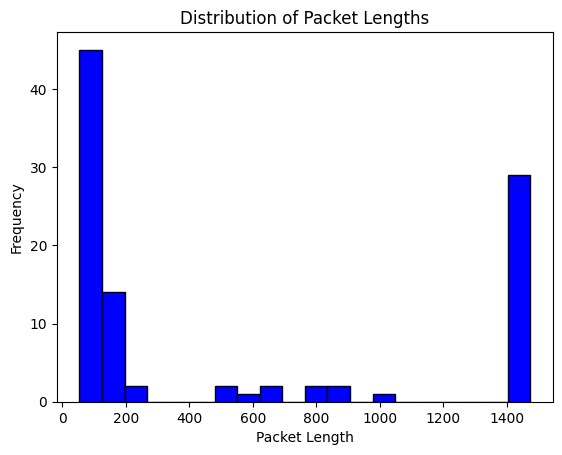

In [18]:
plt.hist(packet_lengths, bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Packet Lengths")
plt.xlabel("Packet Length")
plt.ylabel("Frequency")
plt.show()

Analyze Payloads (Raw Data)

In [19]:
def analyze_payload(packet):
    if UDP in packet and Raw in packet:
        raw_data = packet[Raw].load
        print(f"Raw Payload: {raw_data}")
        # Analyze payload, e.g., decode bytes
        try:
            print(f"Decoded Payload: {raw_data.decode('utf-8')}")
        except UnicodeDecodeError:
            print("Unable to decode payload.")

sniff(iface="Wi-Fi", filter="udp", prn=analyze_payload, count=10)

Raw Payload: b'NOTIFY * HTTP/1.1\r\nHOST: 239.255.255.250:1900\r\nCACHE-CONTROL: max-age=1800\r\nLOCATION: http://192.168.0.1:49152/IGDdevicedesc_brlan0.xml\r\nOPT: "http://schemas.upnp.org/upnp/1/0/"; ns=01\r\n01-NLS: f8a835ba-008c-11ef-b655-e99b8df65cbd\r\nNT: upnp:rootdevice\r\nNTS: ssdp:alive\r\nSERVER: Linux/4.9.300-yocto-standard UPnP/1.0 Portable-SDK-for-UPnP-devices/1.6.22\r\nX-User-Agent: redsonic\r\nUSN: uuid:ebf5a0a0-1dd1-11b2-a90f-acf8cc65462b::upnp:rootdevice\r\n\r\n'
Decoded Payload: NOTIFY * HTTP/1.1
HOST: 239.255.255.250:1900
CACHE-CONTROL: max-age=1800
LOCATION: http://192.168.0.1:49152/IGDdevicedesc_brlan0.xml
OPT: "http://schemas.upnp.org/upnp/1/0/"; ns=01
01-NLS: f8a835ba-008c-11ef-b655-e99b8df65cbd
NT: upnp:rootdevice
NTS: ssdp:alive
SERVER: Linux/4.9.300-yocto-standard UPnP/1.0 Portable-SDK-for-UPnP-devices/1.6.22
X-User-Agent: redsonic
USN: uuid:ebf5a0a0-1dd1-11b2-a90f-acf8cc65462b::upnp:rootdevice


Raw Payload: b'NOTIFY * HTTP/1.1\r\nHOST: 239.255.255.250:1900\

<Sniffed: TCP:0 UDP:10 ICMP:0 Other:0>